<a href="https://colab.research.google.com/github/konrad98ft/cutting-inserts-detection/blob/master/Xception_inserts_deepl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Xcepction model traning**

---

---








# Preparing base model
---



## Imports

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import urllib.request
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

## Building model

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
# outputs = keras.layers.Dense(1)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['acc'])
model.summary()

83689472/83683744 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 20,863,529
Trainable params: 2,049
Non-trainable params: 20,861,480
_________________________________________________________________



## Get data

In [ ]:
data_set_path = '/content/drive/MyDrive/cutting-inserts-samples/DATA_SET_7/'
extract_folder_path = '/content/DATA_SET_7/'
#TRANING
training_file_name = data_set_path + "traning.zip"
training_dir = extract_folder_path + 'traning/'
zip_ref = zipfile.ZipFile(training_file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

#VALIDATION
validation_file_name = data_set_path + "validation.zip"
validation_dir = extract_folder_path + 'validation/'
zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

#TEST
test_file_name = data_set_path + "test.zip"
test_dir = extract_folder_path + 'test/'
zip_ref = zipfile.ZipFile(test_file_name, 'r')
zip_ref.extractall(test_dir)
zip_ref.close()





## Augumentaion 

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   zoom_range=0.05,
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1, 
                                   horizontal_flip=True,
                                   vertical_flip=True,  
                                   rotation_range=5)



# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(training_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode='binary',
                                                         target_size=(150, 150))





Found 138 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


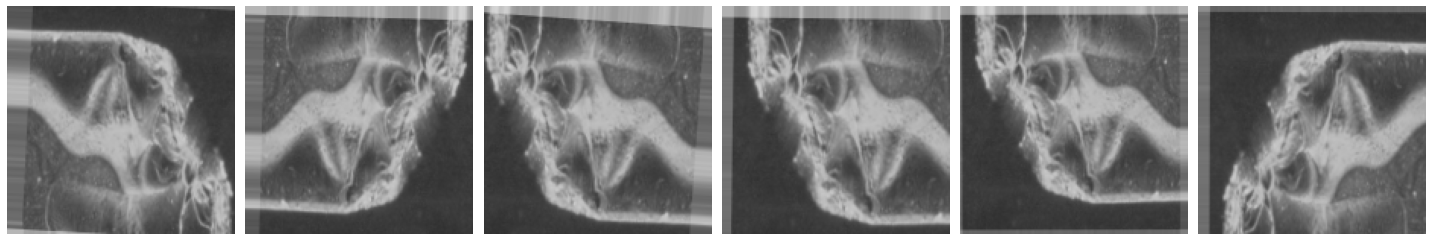

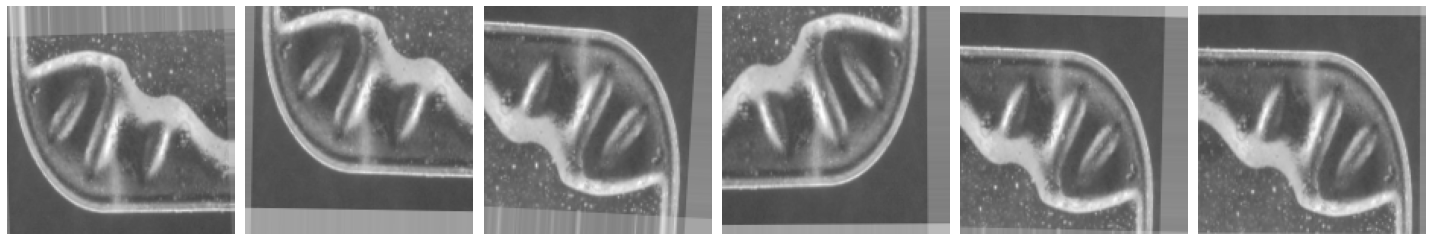

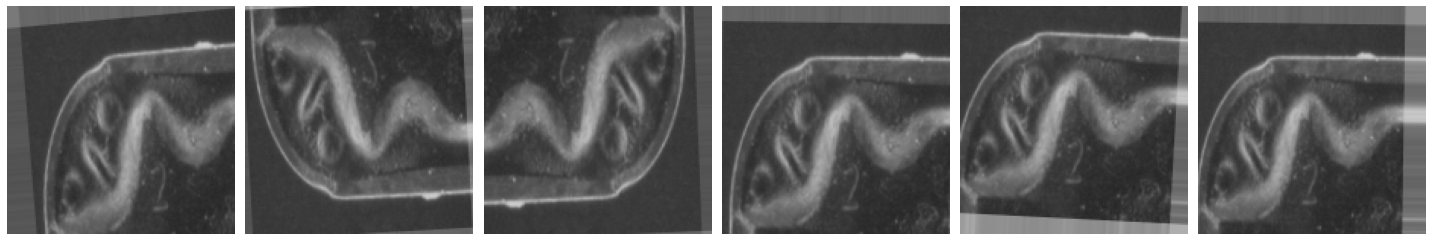

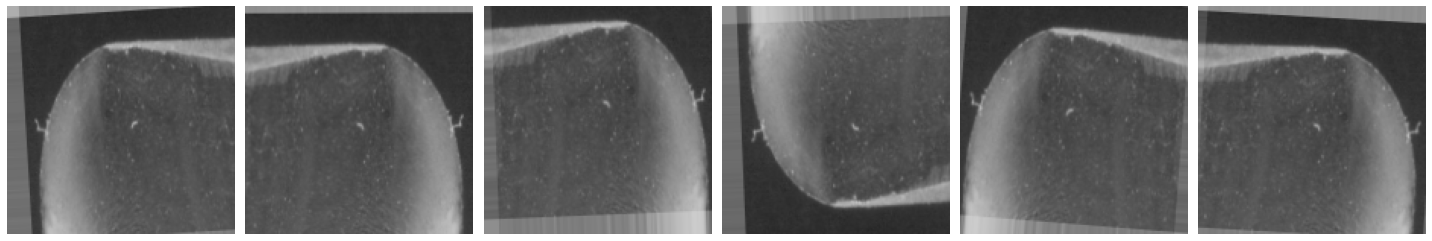

In [ ]:
#Example augumentation
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('Off')
    plt.tight_layout()
    plt.show()
    
for j in range(4):
  augmented_images = [train_generator[0][0][j] for i in range(6) ]
  plotImages(augmented_images)


## Model fit

In [ ]:
history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=20,
            verbose=2)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:5017: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


7/7 - 35s - loss: 0.6756 - acc: 0.5507 - val_loss: 0.5039 - val_acc: 0.8269
Epoch 2/20
7/7 - 1s - loss: 0.4569 - acc: 0.8623 - val_loss: 0.3486 - val_acc: 0.9231
Epoch 3/20
7/7 - 1s - loss: 0.3551 - acc: 0.8841 - val_loss: 0.2777 - val_acc: 0.9231
Epoch 4/20
7/7 - 1s - loss: 0.2814 - acc: 0.9275 - val_loss: 0.2401 - val_acc: 0.9423
Epoch 5/20
7/7 - 1s - loss: 0.2343 - acc: 0.9203 - val_loss: 0.2260 - val_acc: 0.9423
Epoch 6/20
7/7 - 1s - loss: 0.2437 - acc: 0.9058 - val_loss: 0.2107 - val_acc: 0.9423
Epoch 7/20
7/7 - 1s - loss: 0.2054 - acc: 0.9203 - val_loss: 0.2021 - val_acc: 0.9423
Epoch 8/20
7/7 - 1s - loss: 0.1996 - acc: 0.9348 - val_loss: 0.2056 - val_acc: 0.9423
Epoch 9/20
7/7 - 1s - loss: 0.2017 - acc: 0.9130 - val_loss: 0.2127 - val_acc: 0.9423
Epoch 10/20
7/7 - 1s - loss: 0.1807 - acc: 0.9565 - val_loss: 0.2033 - val_acc: 0.9423
Epoch 11/20
7/7 - 1s - loss: 0.1713 - acc: 0.9493 - val_loss: 0.1819 - val_acc: 0.9423
Epoch 12/20
7/7 - 1s - loss: 0.1684 - acc: 0.9275 - val_loss: 

# Base model results

---



## Accuracy and los visualization

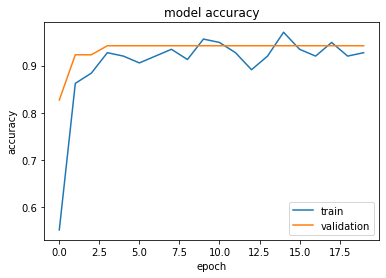

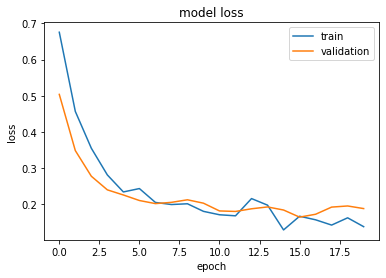

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Example samples

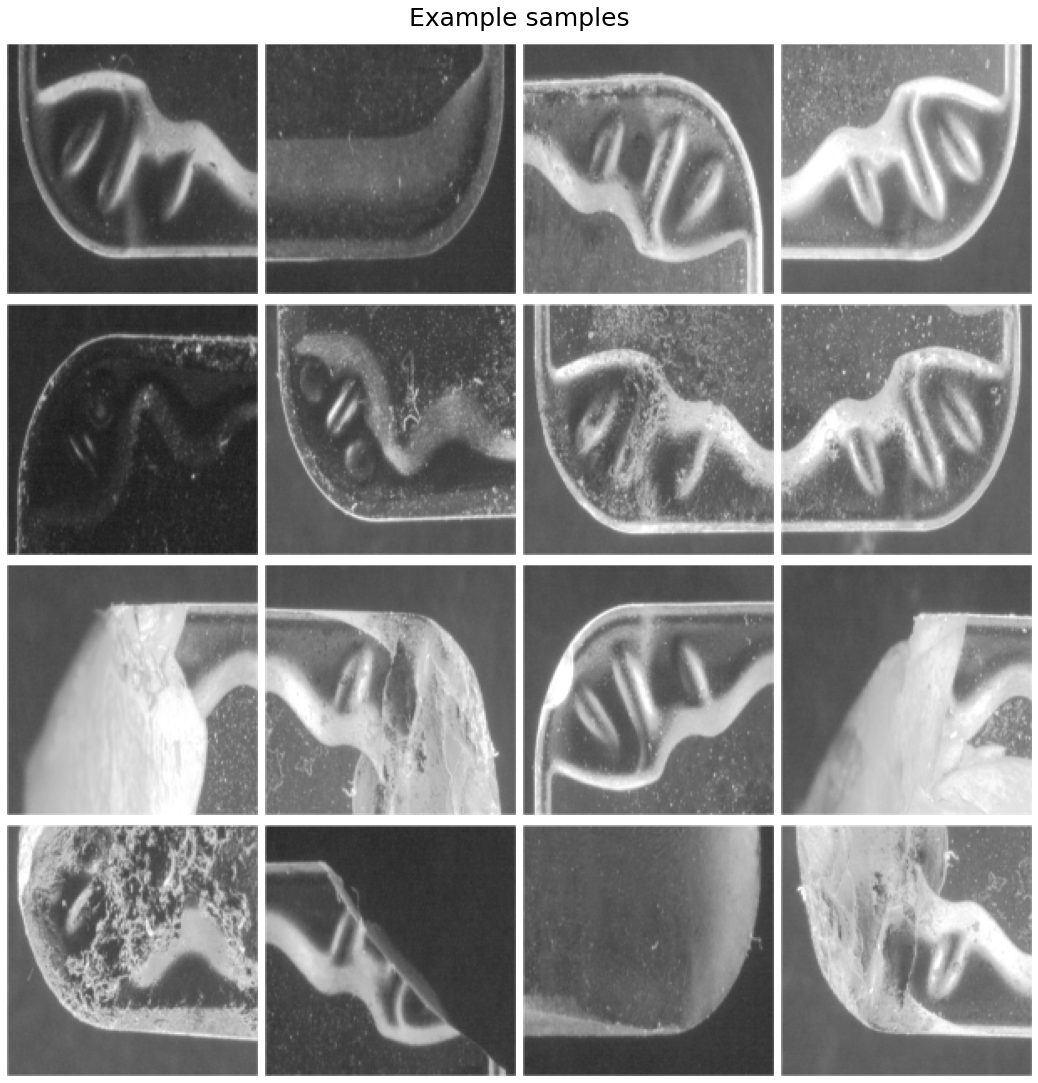

In [ ]:
#import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_good_inserts_names = os.listdir(test_dir+'samples_good')
test_faulty_inserts_names = os.listdir(test_dir+'samples_faulty')

%matplotlib inline
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


pic_index += 8
next_good_pix = [os.path.join(test_dir+'samples_good', fname) 
                for fname in test_good_inserts_names[pic_index-8:pic_index]]
next_faulty_pix = [os.path.join(test_dir+'samples_faulty', fname) 
                for fname in test_faulty_inserts_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_good_pix + next_faulty_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
fig.suptitle("Example samples",fontsize=25)
plt.tight_layout(pad=6, w_pad=0.5, h_pad=1.0)
plt.show()

In [ ]:
next_good_pix = [os.path.join(test_dir + 'samples_good', fname) 
                for fname in test_good_inserts_names[:]]
next_faulty_pix = [os.path.join(test_dir + 'samples_faulty', fname) 
                for fname in test_faulty_inserts_names[:]]

uploaded = next_faulty_pix + next_good_pix

classification = []

for fn in uploaded:
  img = image.load_img(fn, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x/=255
  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  classification.append(classes)




## Results

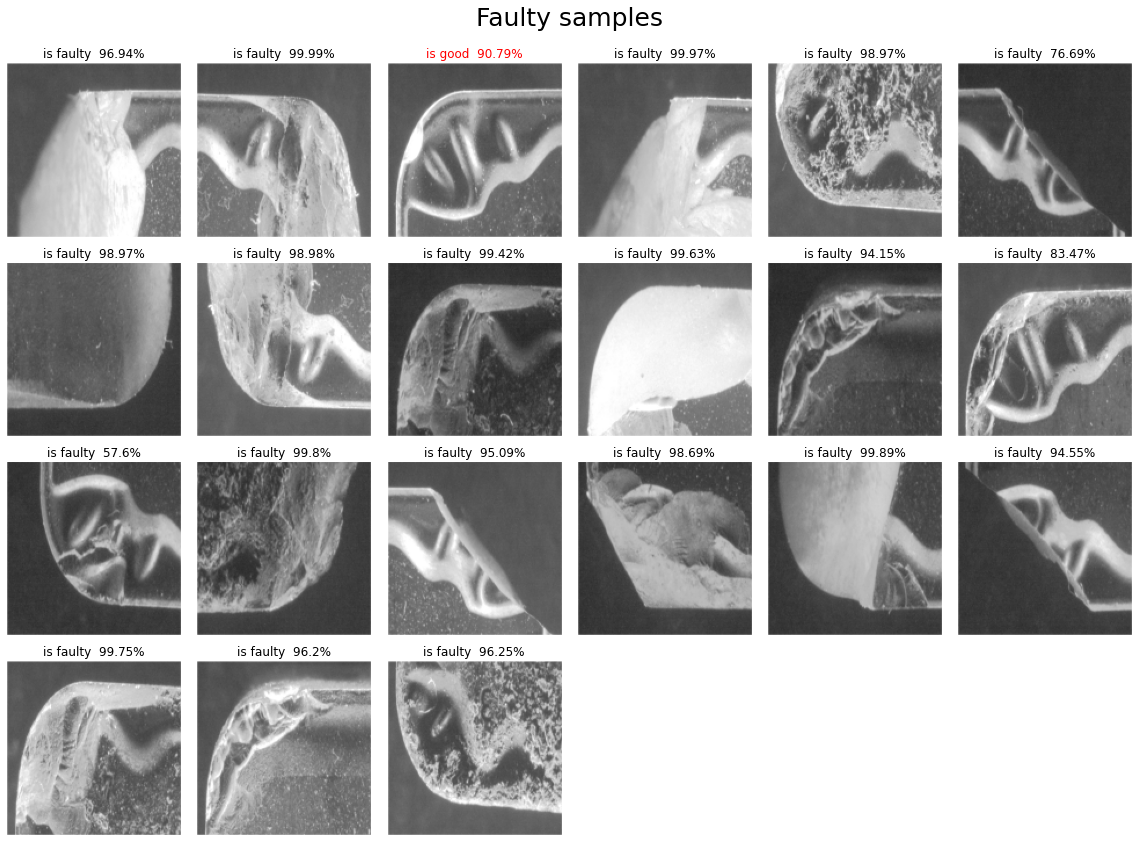

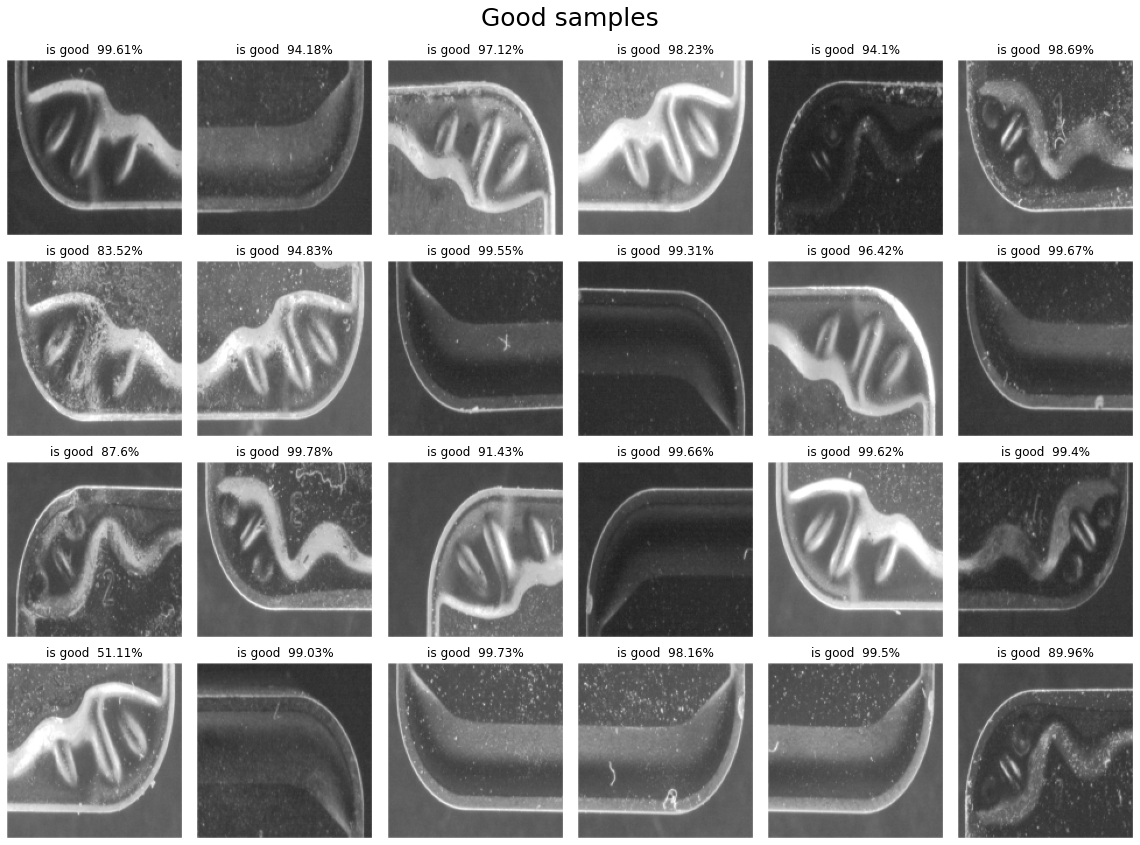

In [ ]:
false_faulty_identification = 0 
true_faulty_identification = 0 
n_cols = 6
n_rows = int(len(next_faulty_pix)/n_cols + n_cols)
fig = plt.gcf()
fig.set_size_inches(n_cols * 3, n_rows * 3)

for i, img_path in enumerate(next_faulty_pix):
  if classification[i] > 0.5:
    title =  "is good  " + str(round(float((classification[i])*100),2)) + "%"
    params = {"text.color" : "red"}
    plt.rcParams.update(params)
    false_faulty_identification += 1
  else:
    title =  "is faulty  " + str(round(float((1-classification[i])*100),2)) + "%"
    params = {"text.color" : "black"}
    plt.rcParams.update(params)
    true_faulty_identification +=1
 
  sp = plt.subplot(n_rows, n_cols, i + 1)
  sp.title.set_text(title)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

params = {"text.color" : "black"}
plt.rcParams.update(params)
fig.suptitle("Faulty samples",fontsize=25)
plt.tight_layout(pad=8,w_pad=0.5, h_pad=1.0)
plt.show()

false_good_identification = 0
true_good_identification = 0
n_cols = 6
n_rows = int(len(next_good_pix)/n_cols + n_cols)
fig = plt.gcf()
fig.set_size_inches(n_cols * 3, n_rows * 3)

for j, img_path in enumerate(next_good_pix):
  

  if classification[j+i+1] > 0.5:
    true_good_identification +=1
    title =  "is good  " + str(round(float((classification[j+i+1])*100),2)) + "%"
    params = {"text.color" : "black"}
    plt.rcParams.update(params)
  else:
    title =  "is faulty  " + str(round(float((1-classification[j+i+1])*100),2)) + "%"
    false_good_identification +=1
    params = {"text.color" : "red"}
    plt.rcParams.update(params)
  
  sp = plt.subplot(n_rows, n_cols, j + 1)
  sp.title.set_text(title)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

params = {"text.color" : "black"}
plt.rcParams.update(params)
fig.suptitle("Good samples",fontsize=25)
plt.tight_layout(pad=8,w_pad=0.5, h_pad=1.0)
plt.show()

In [ ]:
wrong_identification = false_good_identification + false_faulty_identification
correct = len(uploaded)-wrong_identification
accuracy = correct/len(uploaded)*100
PPV = true_good_identification/(true_good_identification + false_good_identification)*100
NPV = true_faulty_identification/(true_faulty_identification + false_faulty_identification)*100

print("Number of test images:",len(uploaded))
print("Identified corectly:",correct)
print("Identified incorectly:",wrong_identification)



print("PPV {:.2f}%".format(PPV))
print("NPV {:.2f}%".format(NPV))
print("Overall ccuracy: {:.2f}%".format(accuracy))

Number of test images: 45
Identified corectly: 44
Identified incorectly: 1
PPV 100.00%
NPV 95.24%
Overall ccuracy: 97.78%


## Result charts

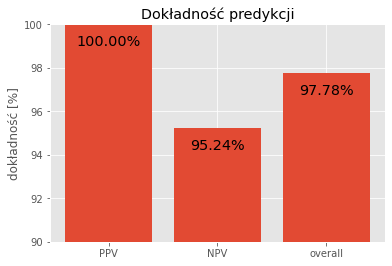

In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        y_txt = "{:.2f}%".format(y[i])
        plt.text(i, y[i]-1, y_txt, ha = 'center', fontsize="x-large")

plt.style.use('ggplot')

x = ['PPV', 'NPV', 'overall']
precent = [PPV,NPV,accuracy]

x_pos = [i for i, _ in enumerate(x)]

fig = plt.bar(x_pos, precent)
plt.ylabel("dokładność [%]")
plt.title("Dokładność predykcji")
plt.ylim(int(min(PPV,NPV)-5),100)
plt.xticks(x_pos, x)
addlabels(x, precent)


plt.show()



# **Fine tuning**

---



---



### Accuracy and los visualization (fine tuning)

In [ ]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['acc'])

# Train end-to-end. Be careful to stop before you overfit!
history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=40,
            verbose=2,
            initial_epoch=20)

Epoch 21/40


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:5017: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`binary_crossentropy` received `from_logits=True`, but the `output`'


7/7 - 6s - loss: 0.0561 - acc: 0.9783 - val_loss: 0.1657 - val_acc: 0.9615
Epoch 22/40
7/7 - 2s - loss: 0.0765 - acc: 0.9638 - val_loss: 0.0644 - val_acc: 0.9808
Epoch 23/40
7/7 - 2s - loss: 0.0516 - acc: 0.9855 - val_loss: 0.0965 - val_acc: 0.9808
Epoch 24/40
7/7 - 2s - loss: 0.0281 - acc: 0.9855 - val_loss: 0.1653 - val_acc: 0.9615
Epoch 25/40
7/7 - 2s - loss: 0.0533 - acc: 0.9710 - val_loss: 0.1262 - val_acc: 0.9615
Epoch 26/40
7/7 - 2s - loss: 0.0861 - acc: 0.9565 - val_loss: 0.1537 - val_acc: 0.9615
Epoch 27/40
7/7 - 2s - loss: 0.0310 - acc: 0.9855 - val_loss: 0.0957 - val_acc: 0.9808
Epoch 28/40
7/7 - 2s - loss: 0.0537 - acc: 0.9783 - val_loss: 0.1110 - val_acc: 0.9615
Epoch 29/40
7/7 - 2s - loss: 0.0353 - acc: 0.9783 - val_loss: 0.1264 - val_acc: 0.9615
Epoch 30/40
7/7 - 2s - loss: 0.0248 - acc: 0.9928 - val_loss: 0.1005 - val_acc: 0.9615
Epoch 31/40
7/7 - 2s - loss: 0.0135 - acc: 1.0000 - val_loss: 0.0489 - val_acc: 0.9808
Epoch 32/40
7/7 - 2s - loss: 0.0327 - acc: 0.9855 - val

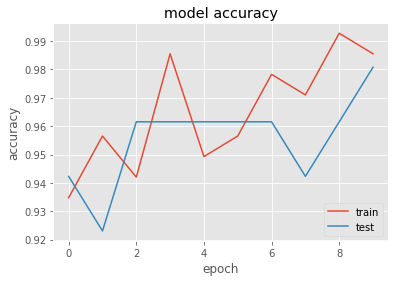

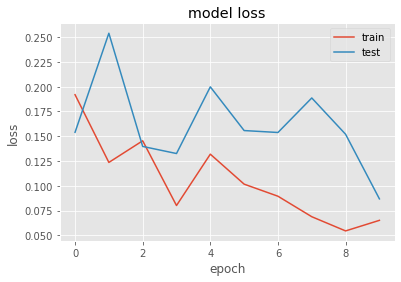

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Results (fine tuning)

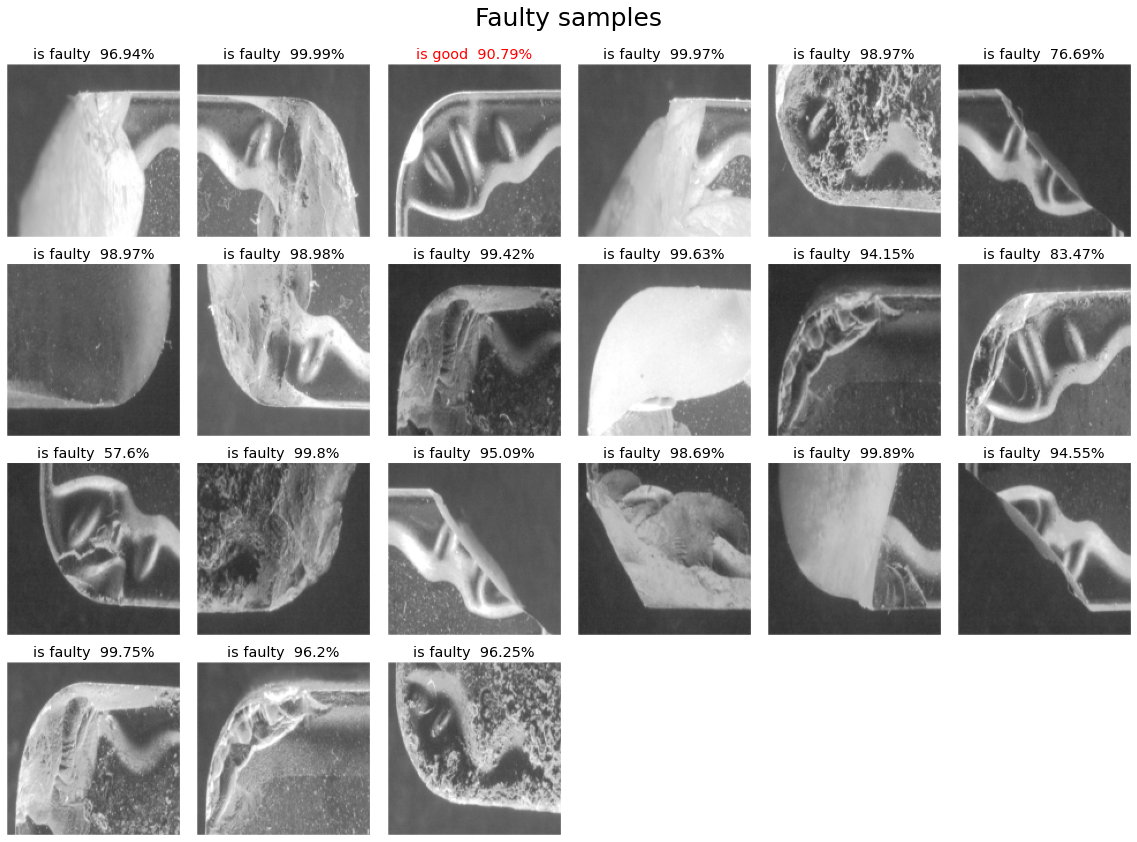

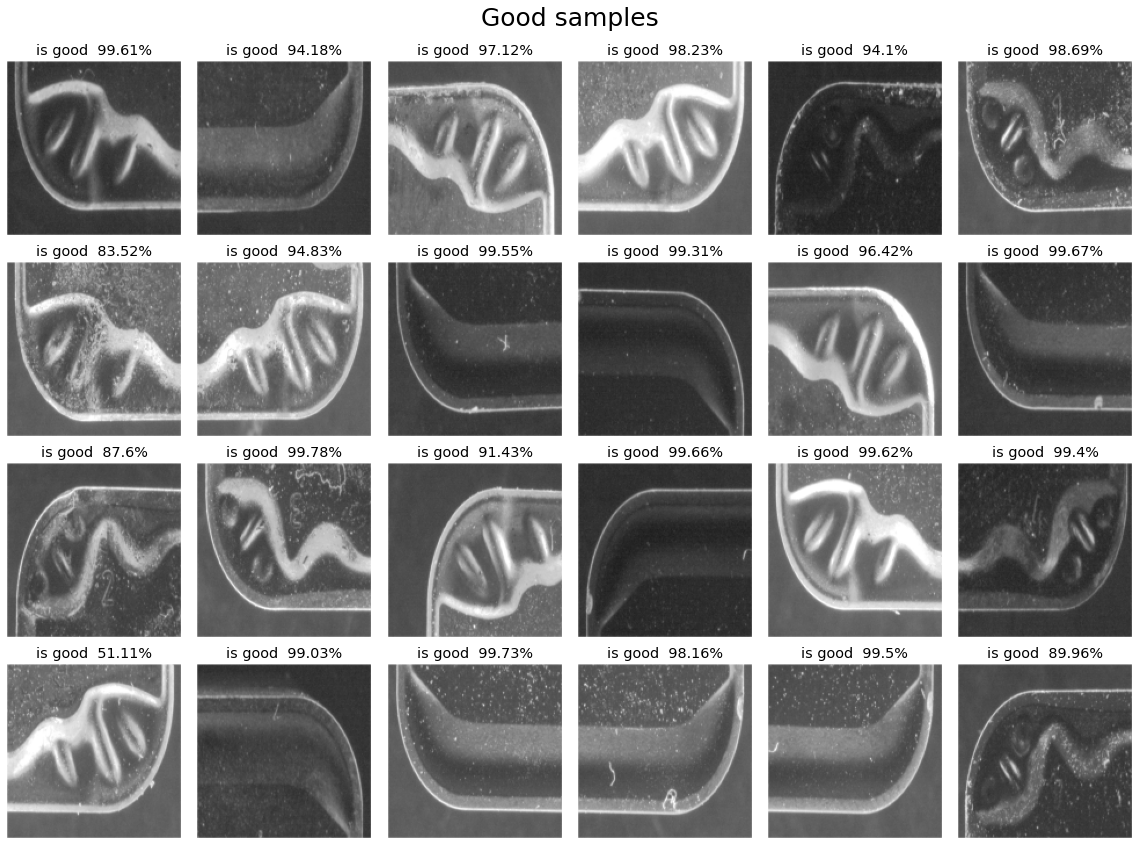

In [ ]:
false_faulty_identification = 0 
true_faulty_identification = 0 
n_cols = 6
n_rows = int(len(next_faulty_pix)/n_cols + n_cols)
fig = plt.gcf()
fig.set_size_inches(n_cols * 3, n_rows * 3)

for i, img_path in enumerate(next_faulty_pix):
  if classification[i] > 0.5:
    title =  "is good  " + str(round(float((classification[i])*100),2)) + "%"
    params = {"text.color" : "red"}
    plt.rcParams.update(params)
    false_faulty_identification += 1
  else:
    title =  "is faulty  " + str(round(float((1-classification[i])*100),2)) + "%"
    params = {"text.color" : "black"}
    plt.rcParams.update(params)
    true_faulty_identification +=1
 
  sp = plt.subplot(n_rows, n_cols, i + 1)
  sp.title.set_text(title)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

params = {"text.color" : "black"}
plt.rcParams.update(params)
fig.suptitle("Faulty samples",fontsize=25)
plt.tight_layout(pad=8,w_pad=0.5, h_pad=1.0)
plt.show()

false_good_identification = 0
true_good_identification = 0
n_cols = 6
n_rows = int(len(next_good_pix)/n_cols + n_cols)
fig = plt.gcf()
fig.set_size_inches(n_cols * 3, n_rows * 3)

for j, img_path in enumerate(next_good_pix):
  

  if classification[j+i+1] > 0.5:
    true_good_identification +=1
    title =  "is good  " + str(round(float((classification[j+i+1])*100),2)) + "%"
    params = {"text.color" : "black"}
    plt.rcParams.update(params)
  else:
    title =  "is faulty  " + str(round(float((1-classification[j+i+1])*100),2)) + "%"
    false_good_identification +=1
    params = {"text.color" : "red"}
    plt.rcParams.update(params)
  
  sp = plt.subplot(n_rows, n_cols, j + 1)
  sp.title.set_text(title)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

params = {"text.color" : "black"}
plt.rcParams.update(params)
fig.suptitle("Good samples",fontsize=25)
plt.tight_layout(pad=8,w_pad=0.5, h_pad=1.0)
plt.show()

### Results chart (fine tuning)

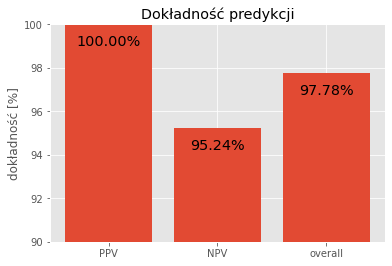

In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        y_txt = "{:.2f}%".format(y[i])
        plt.text(i, y[i]-1, y_txt, ha = 'center', fontsize="x-large")

plt.style.use('ggplot')

x = ['PPV', 'NPV', 'overall']
precent = [PPV,NPV,accuracy]

x_pos = [i for i, _ in enumerate(x)]

fig = plt.bar(x_pos, precent)
plt.ylabel("dokładność [%]")
plt.title("Dokładność predykcji")
plt.ylim(int(min(PPV,NPV)-5),100)
plt.xticks(x_pos, x)
addlabels(x, precent)


plt.show()



# Model structure

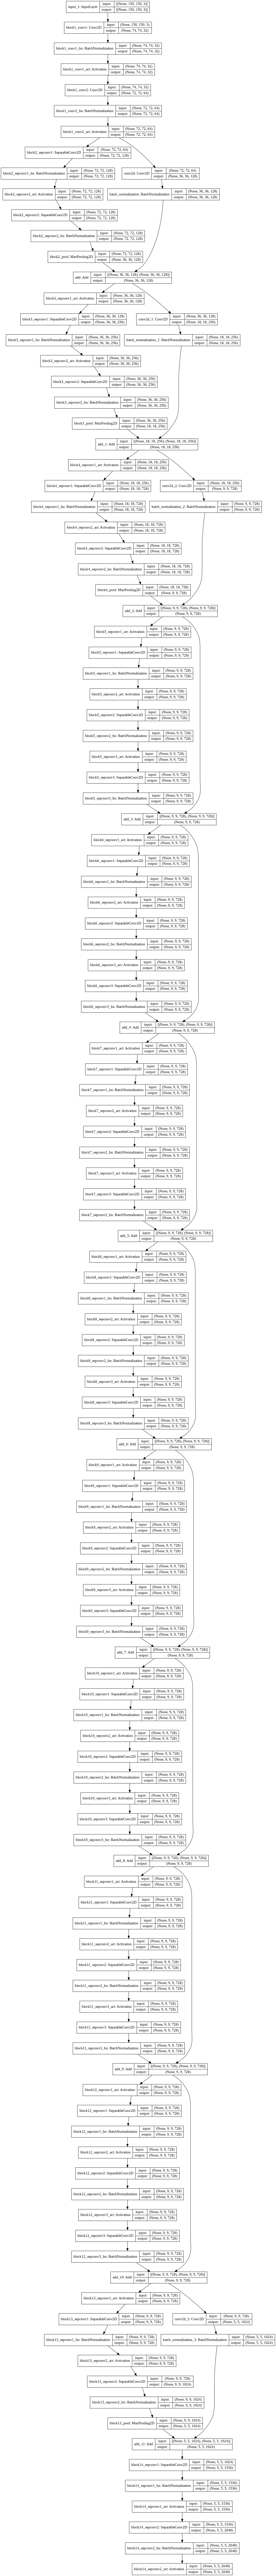

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(base_model, to_file='conv_base.png', show_shapes=True)
from IPython.display import Image
Image(filename='conv_base.png') 

# Manual tests

In [ ]:
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:

# TESTING NEW IMAGES - NEED TO UPDATE IT
import numpy as np
from google.colab import files
from keras.preprocessing import image
import cv2 as cv

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = cv.imread(path, cv.IMREAD_UNCHANGED)
  x = cv.resize(img, (150,150))[None, ...] / 255
  # x /= 255
  print(img.shape)
  # img = image.load_img(path, target_size=(150, 150))
  # x = image.img_to_array(img)
  # x = np.expand_dims(x, axis=0)
  # x/=255

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is good")
  else:
    print(fn + " is faulty")
 

# Load & Save model

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/cutting-inserts-samples/model_xception')

In [ ]:
model.save('/content/drive/MyDrive/cutting-inserts-samples/model_xception')